In [2]:
!pip install --upgrade numpy


In [8]:
!pip install --upgrade statsmodels


In [2]:
!pip install pmdarima

In [1]:
import numpy as np

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [4]:
# Step 1: Data Collection
stock = "TSLA"
start_date = "2014-06-01"
end_date = "2016-12-31"
df = yf.download(stock, start=start_date, end=end_date)



[*********************100%%**********************]  1 of 1 completed


In [5]:
#View Data Frame
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,13.822000,13.956667,13.444667,13.646667,13.646667,70021500
2014-06-03,13.566000,13.866667,13.506000,13.662667,13.662667,57912000
2014-06-04,13.623333,13.750667,13.360000,13.599333,13.599333,51411000
2014-06-05,13.631333,13.946667,13.603333,13.793333,13.793333,60819000
2014-06-06,13.983333,14.054000,13.812000,13.878000,13.878000,46107000
...,...,...,...,...,...,...
2016-12-23,13.866667,14.230000,13.847333,14.222667,14.222667,70057500
2016-12-27,14.325333,14.816667,14.294667,14.635333,14.635333,88735500
2016-12-28,14.768667,14.920000,14.480000,14.649333,14.649333,56737500


In [6]:
#The data types of columns to know what dataset we are working with.
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 653 entries, 2014-06-02 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       653 non-null    float64
 1   High       653 non-null    float64
 2   Low        653 non-null    float64
 3   Close      653 non-null    float64
 4   Adj Close  653 non-null    float64
 5   Volume     653 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 35.7 KB


In [8]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

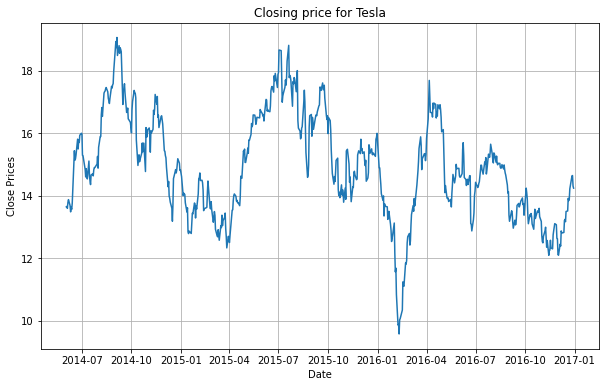

In [10]:
#Lets just visualize the stock market to see how it looks.
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Closing price for Tesla')
plt.show()

<AxesSubplot:ylabel='Density'>

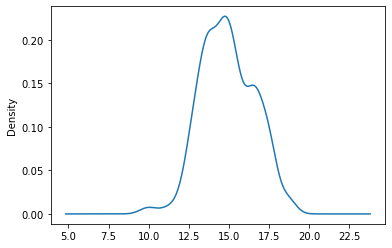

In [11]:
#Distribution of the dataset
df_close=df['Close']
df_close.plot(kind='kde')

We note that we need all columns to extract valuble information from the dataset since when analyzing the market several variables or more impact the volititity of that specfic stock market

In [12]:
#Dependemt and independent varables
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [13]:
#Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

No handles with labels found to put in legend.


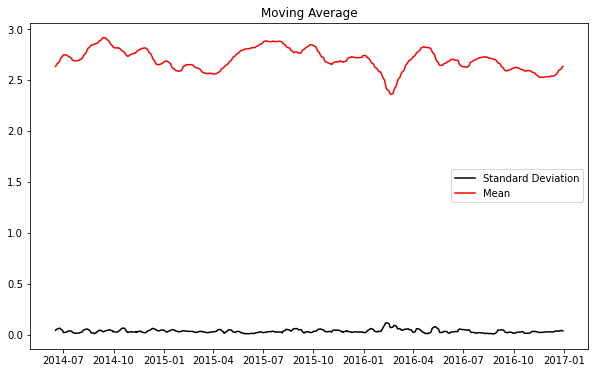

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


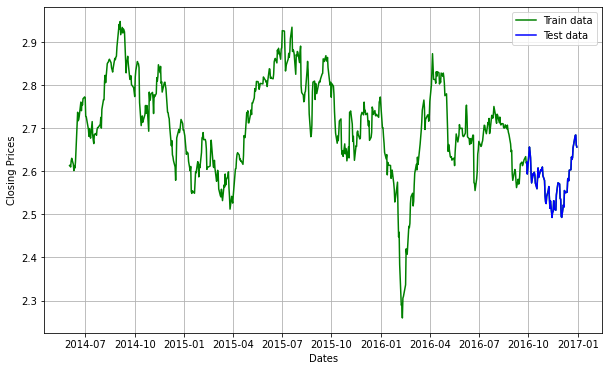

In [16]:
#Visalize the train and test datasets
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [23]:
#Normalizing our dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Step 3: Model Selection
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Step 4: Model Evaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [26]:
# Convert the date index to a list of strings
date_strings = [str(date) for date in y_test.index]

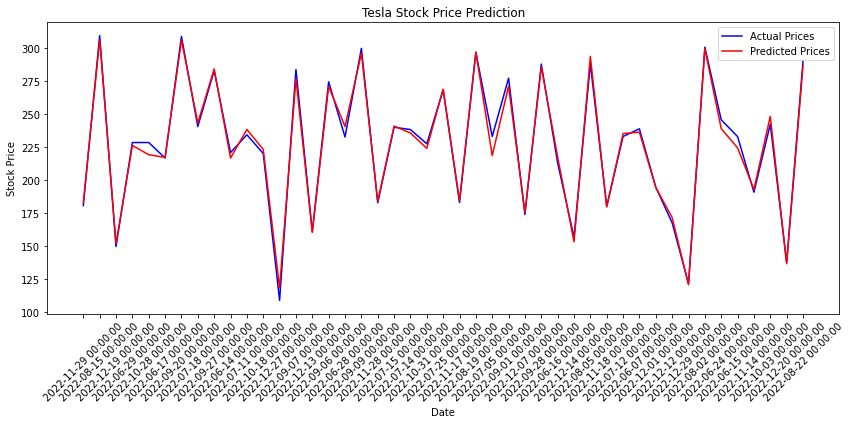

MAE: 3.46
MSE: 20.68
RMSE: 4.55


In [27]:
# Visualize predicted vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(date_strings, y_test.values, label="Actual Prices", color='blue')
plt.plot(date_strings, y_pred, label="Predicted Prices", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price Prediction")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
#Conclude and comment on over fitting not being present on how its diffrent for diffrent stocks.... variability.

In [20]:
stock = "TSLA"
start_date = "2012-06-01"
end_date = "2020-12-31"
data= yf.download(stock, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


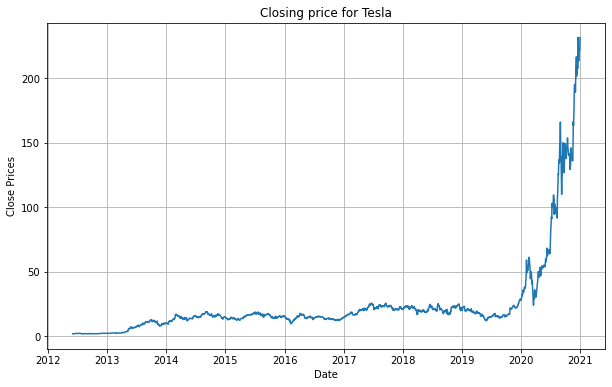

In [22]:
#Lets just visualize the stock market to see how it looks.
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Closing price for Tesla')
plt.show()